<a href="https://colab.research.google.com/github/ali-kmirzaei/NN-and-DL/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential #FeedForward
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKeras

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# Convert class vectors to binary class matrices.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
y_train.shape

(60000, 10)

In [5]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2),
            trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

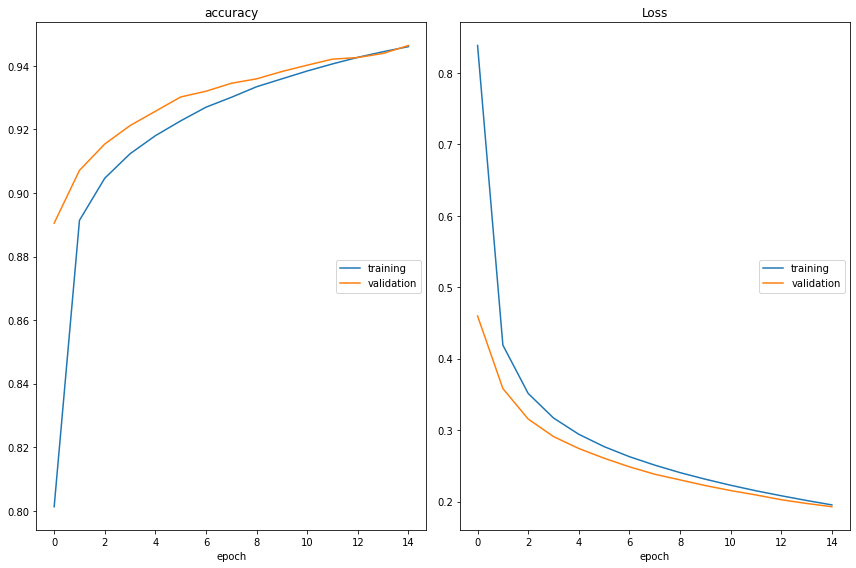

accuracy
	training         	 (min:    0.801, max:    0.946, cur:    0.946)
	validation       	 (min:    0.891, max:    0.946, cur:    0.946)
Loss
	training         	 (min:    0.195, max:    0.838, cur:    0.195)
	validation       	 (min:    0.193, max:    0.460, cur:    0.193)


In [18]:
# Model:
EPOCHES = 15
LEARNING_RATE = 0.01
METRICS = ['accuracy']
LOSS = 'categorical_crossentropy'
# LOSS = 'mse'
VALIDATION_DATA = (x_test, y_test)

model = Sequential()
model.add(Input(shape=x_test[0].shape))
model.add(Flatten())
model.add(Linear(1024))
model.add(keras.layers.ReLU())
# model.add(keras.layers.LeakyReLU())
model.add(Linear(10))
model.add(keras.layers.Softmax())


# model.add(Dense(512, activation='relu'))
# model.add(Dense(10 , activation='softmax'))

# model.summary()


opt = SGD(learning_rate = LEARNING_RATE)
model.compile(optimizer=opt, loss=LOSS, metrics=METRICS)
history = model.fit(x_train, y_train, epochs=EPOCHES, batch_size=100, validation_data=VALIDATION_DATA, callbacks=[PlotLossesKeras()], verbose=0)
